# Análisis geospacial con GeoPandas

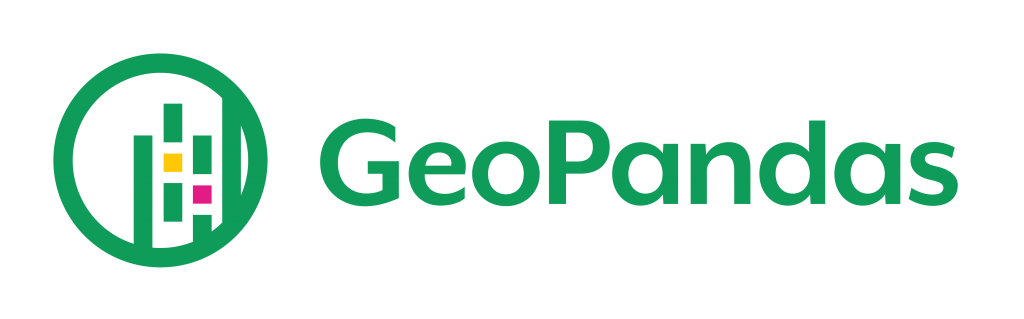

¿Qué podemos hacer con GeoPandas:
* Leer y escribir datos geoespaciales de archivos en múltiples formatos vectorizados
* Calcular y obtener indicadores geométricos como áreas, distancias, coordenadas, centroides, puntos sobre superfície, perímetro, generar buffers, uniones, transformar geometrías, etc…
* Generar vistas de mapas sencillas personalizando su aspecto.
* Realizar análisis espacial, es decir, estudiar las relaciones espaciales entre distintas geometrías.
* Asignar proyecciones a datos o reproyectar los datos a otro CRS
* Joins espaciales entre distintos orígenes de datos
* Tareas de geocodificación

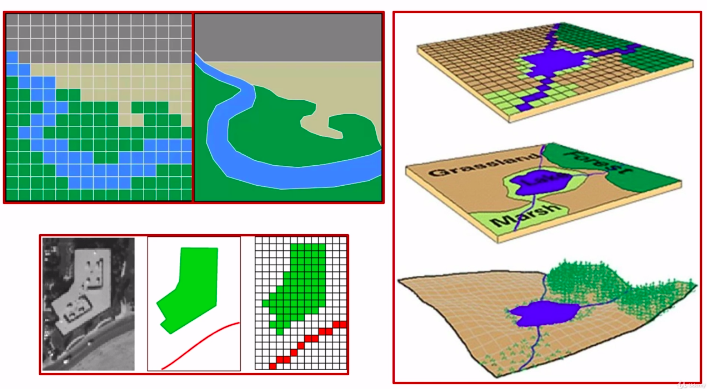

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

## Leer archivos

Vamos a trabajar con un base de datos de las unidades administrativas de la ciudad de Barcelona, que podéis descargar en formato JSON [aquí](https://opendata-ajuntament.barcelona.cat/data/es/dataset/20170706-districtes-barris/resource/cd800462-f326-429f-a67a-c69b7fc4c50a)

In [4]:
ter_municipales = gpd.read_file('distritos.json')

Vamos a quedarnos solo con los distritos


In [6]:
dis = ter_municipales[ter_municipales.TIPUS_UA=='DISTRICTE']

In [7]:
dis.columns= [col.lower() for col in dis.columns]

In [8]:
dis= dis.loc[:,['nom','geometry']]

In [10]:
type(dis)

geopandas.geodataframe.GeoDataFrame

## Métodos y atributos básicos

In [11]:
# Calcular area en km2
dis["area"] = round(dis.area / 1000000, 2)

In [12]:
# Calcular límites
dis["boundary"] = dis.boundary


In [13]:
# Calcular centro
dis["centroid"] = dis.centroid


In [14]:
# Crear un buffer de 500m de radio
dis['buffer'] = dis.centroid.buffer(500)

In [15]:
dis

,nom,geometry,area,boundary,centroid,buffer
1,Ciutat Vella,"POLYGON ((431733.736 4582441.816, 431645.093 4...",4.20,"LINESTRING (431733.736 4582441.816, 431645.093...",POINT (431496.113 4581391.532),"POLYGON ((431996.113 4581391.532, 431993.705 4..."
2,Eixample,"POLYGON ((432033.184 4583665.032, 432033.186 4...",7.46,"LINESTRING (432033.184 4583665.032, 432033.186...",POINT (430147.676 4582565.842),"POLYGON ((430647.676 4582565.842, 430645.268 4..."
3,Sants-Montjuïc,"MULTIPOLYGON (((428773.911 4580873.742, 428692...",22.88,"MULTILINESTRING ((428773.911 4580873.742, 4286...",POINT (428427.540 4577941.595),"POLYGON ((428927.540 4577941.595, 428925.132 4..."
4,Les Corts,"POLYGON ((425054.670 4583672.560, 425047.220 4...",6.01,"LINESTRING (425054.670 4583672.560, 425047.220...",POINT (426277.316 4582086.881),"POLYGON ((426777.316 4582086.881, 426774.908 4..."
5,Sarrià-Sant Gervasi,"MULTIPOLYGON (((422563.071 4587486.743, 422552...",19.92,"MULTILINESTRING ((422563.071 4587486.743, 4225...",POINT (425326.958 4584946.213),"POLYGON ((425826.958 4584946.213, 425824.550 4..."
6,Gràcia,"POLYGON ((427826.987 4586145.355, 427820.696 4...",4.22,"LINESTRING (427826.987 4586145.355, 427820.696...",POINT (429144.450 4584648.339),"POLYGON ((429644.450 4584648.339, 429642.043 4..."
7,Horta-Guinardó,"POLYGON ((429793.927 4589028.390, 429793.389 4...",11.92,"LINESTRING (429793.927 4589028.390, 429793.389...",POINT (429026.896 4586747.884),"POLYGON ((429526.896 4586747.884, 429524.489 4..."
8,Nou Barris,"POLYGON ((432115.848 4590999.098, 432010.849 4...",8.06,"LINESTRING (432115.848 4590999.098, 432010.849...",POINT (431092.259 4588631.676),"POLYGON ((431592.259 4588631.676, 431589.851 4..."
9,Sant Andreu,"POLYGON ((432158.516 4590377.238, 432142.038 4...",6.59,"LINESTRING (432158.516 4590377.238, 432142.038...",POINT (432603.741 4587365.753),"POLYGON ((433103.741 4587365.753, 433101.334 4..."
10,Sant Martí,"POLYGON ((433770.023 4586475.362, 433726.353 4...",10.44,"LINESTRING (433770.023 4586475.362, 433726.353...",POINT (433221.374 4584317.786),"POLYGON ((433721.374 4584317.786, 433718.966 4..."


## Hacer mapas

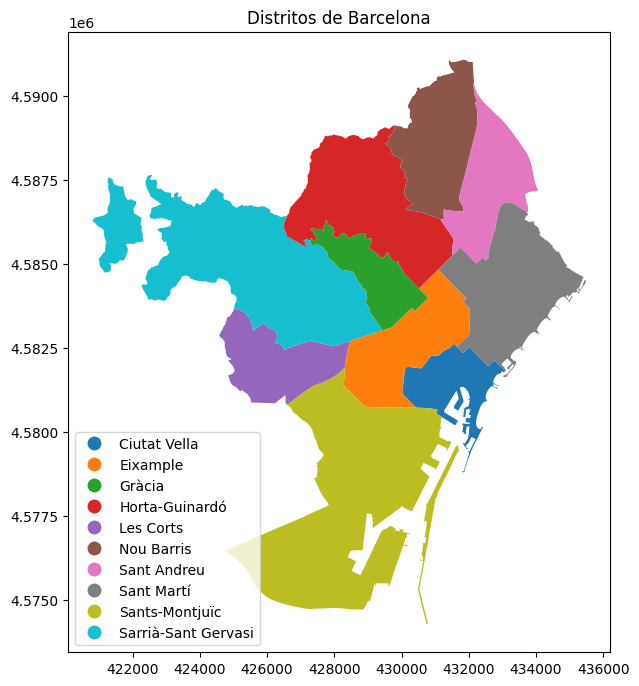

In [16]:
dis.plot(column='nom',figsize=(7,9),legend=True,legend_kwds={'loc': 'lower left'})
plt.title('Distritos de Barcelona')
plt.show()

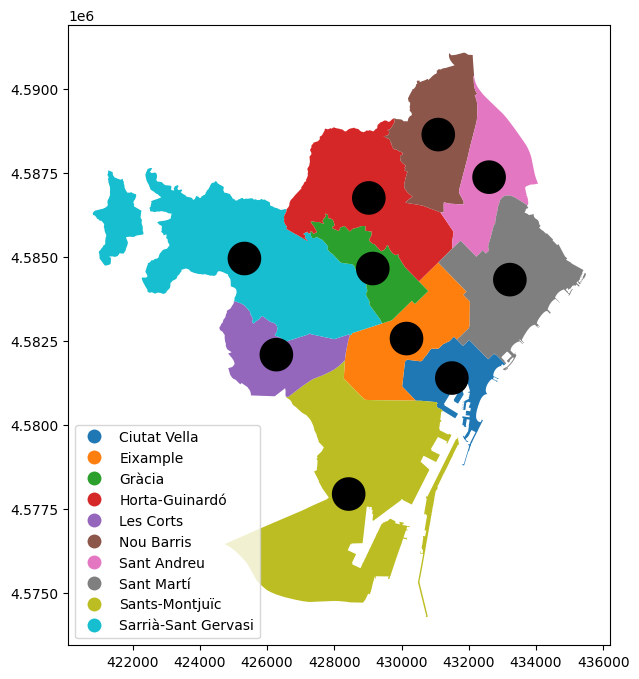

In [17]:
ax=dis.plot(column='nom',figsize=(7,9),legend=True,legend_kwds={'loc': 'lower left'})
dis["buffer"].plot(ax=ax, color="black")
plt.show()

In [18]:
dis.explore("area", legend=True)


## Sistemas de coordenadas y projecciones

Cada GeoSeries tiene su Sistema de Referencia de Coordenadas (CRS) accesible en GeoSeries.crs. El CRS le dice a GeoPandas dónde se encuentran las coordenadas de las geometrías en la superficie terrestre. 

En algunos casos, el CRS es geográfico, lo que significa que las coordenadas están en latitud y longitud. En esos casos, su CRS es WGS84, con código de autoridad EPSG:4326.

Otras veces, se utilizan coordenadas proyectadas.


[Aquí](https://geopandas.org/en/v0.6.0/projections.html) puedes leer más sobre lo que son las projecciones

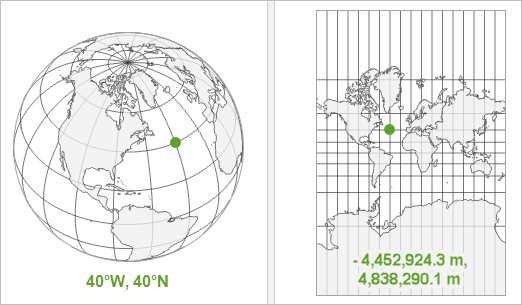!

In [19]:
dis.crs

<Projected CRS: EPSG:25831>
Name: ETRS89 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 0°E and 6°E: Andorra; Belgium - onshore and offshore; Denmark - offshore; Germany - offshore; Jan Mayen - offshore; Norway including Svalbard - onshore and offshore; Spain - onshore and offshore.
- bounds: (0.0, 37.0, 6.01, 82.45)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [20]:
dis.geometry

1     POLYGON ((431733.736 4582441.816, 431645.093 4...
2     POLYGON ((432033.184 4583665.032, 432033.186 4...
3     MULTIPOLYGON (((428773.911 4580873.742, 428692...
4     POLYGON ((425054.670 4583672.560, 425047.220 4...
5     MULTIPOLYGON (((422563.071 4587486.743, 422552...
6     POLYGON ((427826.987 4586145.355, 427820.696 4...
7     POLYGON ((429793.927 4589028.390, 429793.389 4...
8     POLYGON ((432115.848 4590999.098, 432010.849 4...
9     POLYGON ((432158.516 4590377.238, 432142.038 4...
10    POLYGON ((433770.023 4586475.362, 433726.353 4...
Name: geometry, dtype: geometry

In [22]:
dis = dis.to_crs("EPSG:4326")

In [23]:
dis.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [24]:
dis.geometry

1     POLYGON ((2.18345 41.39061, 2.18238 41.39142, ...
2     POLYGON ((2.18690 41.40165, 2.18690 41.40166, ...
3     MULTIPOLYGON (((2.14824 41.37623, 2.14725 41.3...
4     POLYGON ((2.10342 41.40110, 2.10333 41.40111, ...
5     MULTIPOLYGON (((2.07313 41.43522, 2.07300 41.4...
6     POLYGON ((2.13629 41.42363, 2.13621 41.42368, ...
7     POLYGON ((2.15949 41.44977, 2.15948 41.44996, ...
8     POLYGON ((2.18706 41.46772, 2.18580 41.46776, ...
9     POLYGON ((2.18764 41.46212, 2.18744 41.46208, ...
10    POLYGON ((2.20736 41.42711, 2.20684 41.42736, ...
Name: geometry, dtype: geometry

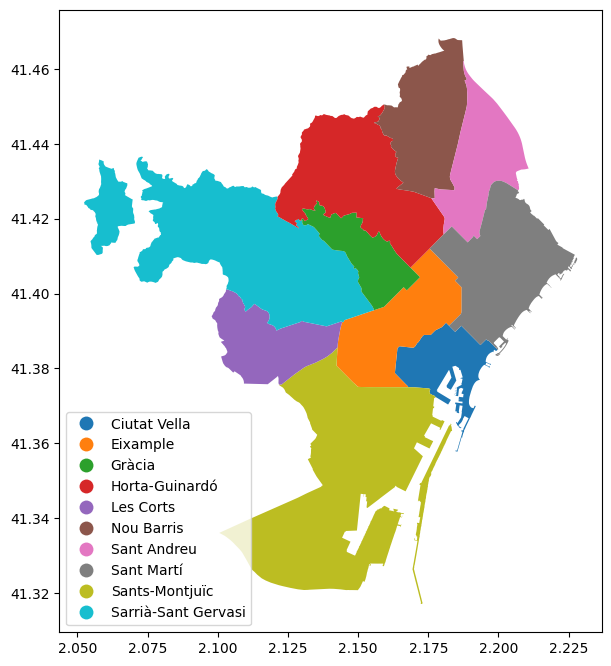

In [25]:
ax=dis.plot(column='nom',figsize=(7,9),legend=True,legend_kwds={'loc': 'lower left'})


Para projectar dos elementos geopandas, deben estar en la misma proyeccion

In [26]:
point = Point(2.1868940442163636, 41.389273569453124)
point=gpd.GeoSeries(point)

In [27]:
point

0    POINT (2.18689 41.38927)
dtype: geometry

In [28]:
point.crs

In [29]:
point= point.set_crs('epsg:4326')

In [30]:
point.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

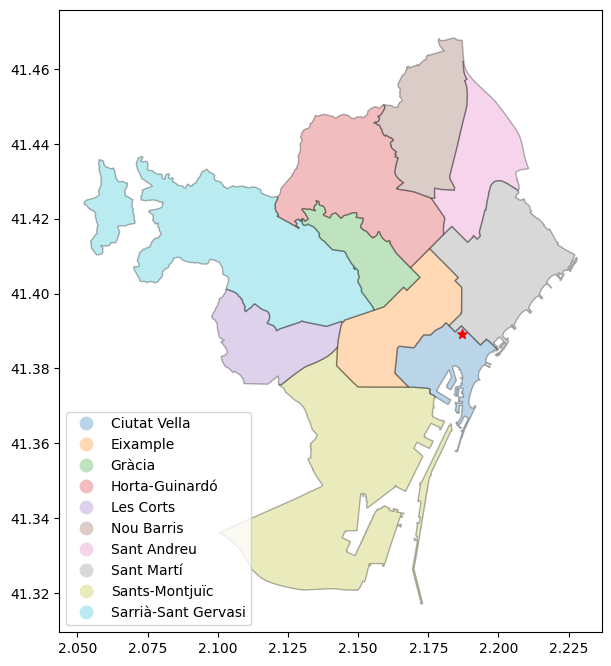

In [31]:
ax = dis.plot(alpha=0.3, column=dis['nom'],edgecolor='black', figsize=(7,10),legend=True,legend_kwds={'loc': 'lower left'})

point.plot(ax=ax, color='red', markersize=50, marker='*', label='establecimiento')
plt.show()